In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import numpy as np

In [10]:
filedict={'g345' : 'dl_G345/datas/modulus_and_damping_ratio.csv',
'g375' : 'dl_G375/datas/modulus_and_damping_ratio.csv',
'g375_1' : 'dl_G375_1/datas/modulus_and_damping_ratio.csv'}
for k, d in enumerate(filedict):
    print(k,d,filedict[d])

0 g345 dl_G345/datas/modulus_and_damping_ratio.csv
1 g375 dl_G375/datas/modulus_and_damping_ratio.csv
2 g375_1 dl_G375_1/datas/modulus_and_damping_ratio.csv


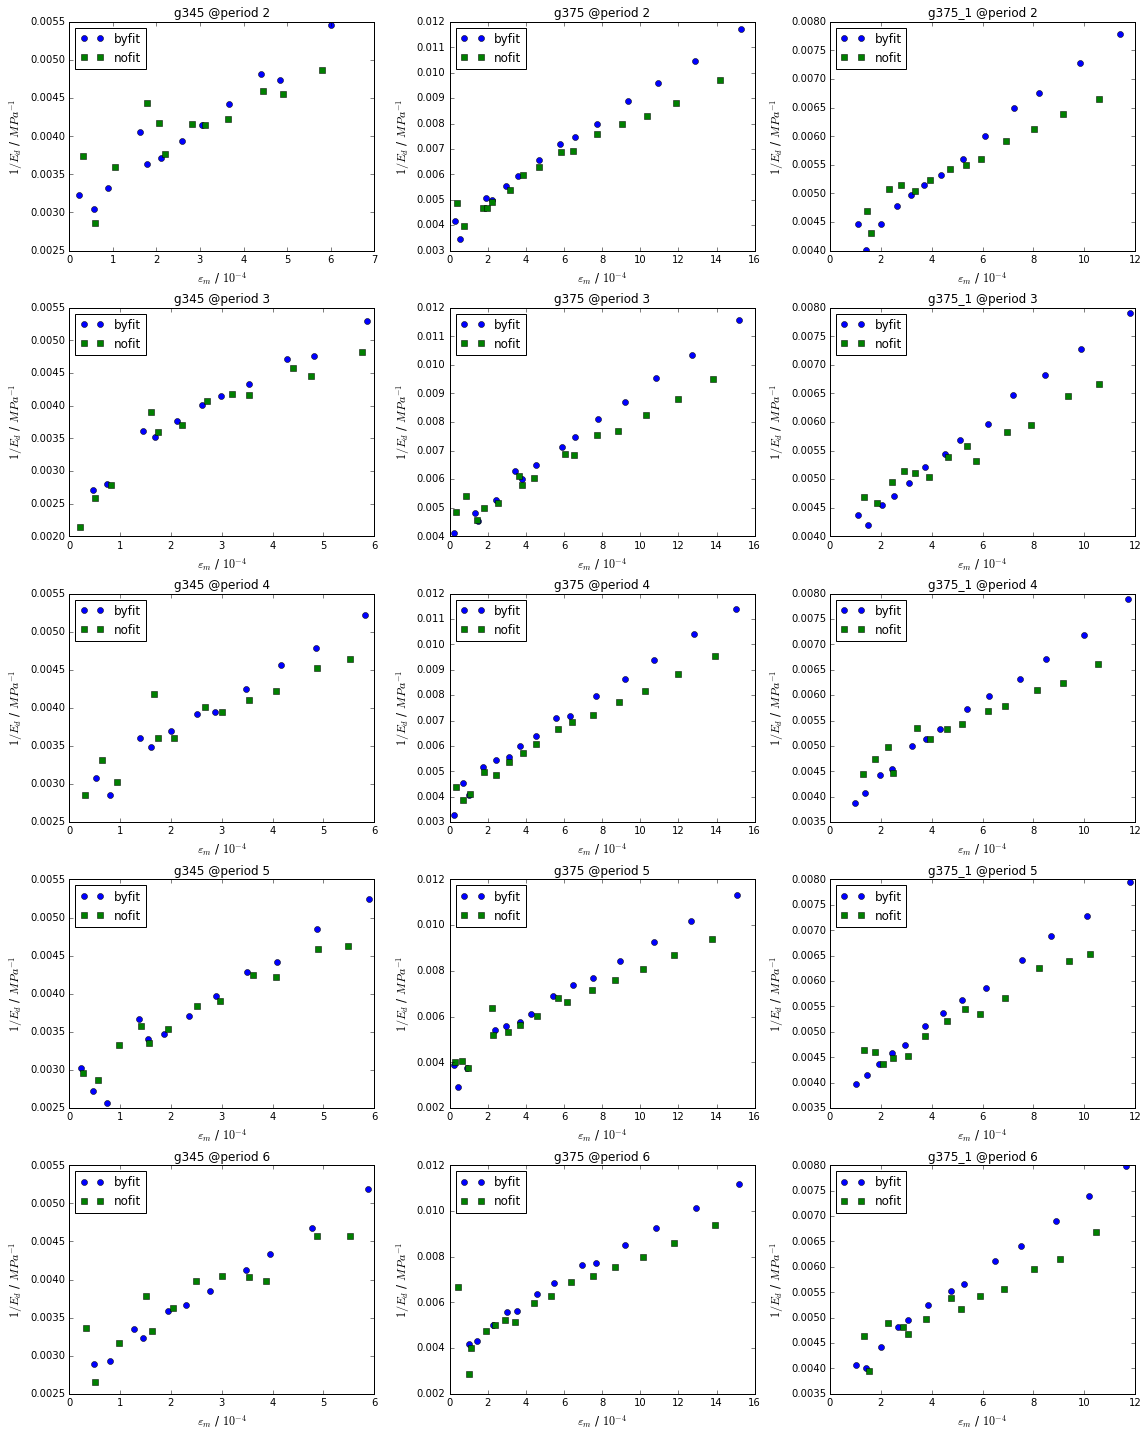

In [14]:
plt.figure(figsize=(16,20),dpi=300)
for i, k in enumerate(filedict):
    df = pd.read_csv(filedict[k], encoding='gb2312', header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    for p, col in enumerate('23456'):
        data = df[col]
        
        line_byfit =
        plt.subplot(5,3,3*p+i+1)
        plt.plot(data['epsilon_m_byfit'][1:]*1e4, 1000/data['modulus_byfit'][1:],'o',label='byfit')
        plt.plot(data['epsilon_m'][1:]*1e4, 1000/data['modulus'][1:],'s',label='nofit')
        plt.legend(loc=0)
        plt.ylabel(r'$1/E_d$ / $MPa^{-1}$', fontsize=12)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=12)
        plt.title('{0} @period {1}'.format(k, col))
plt.tight_layout()
plt.savefig('figs/linearEd.svg')

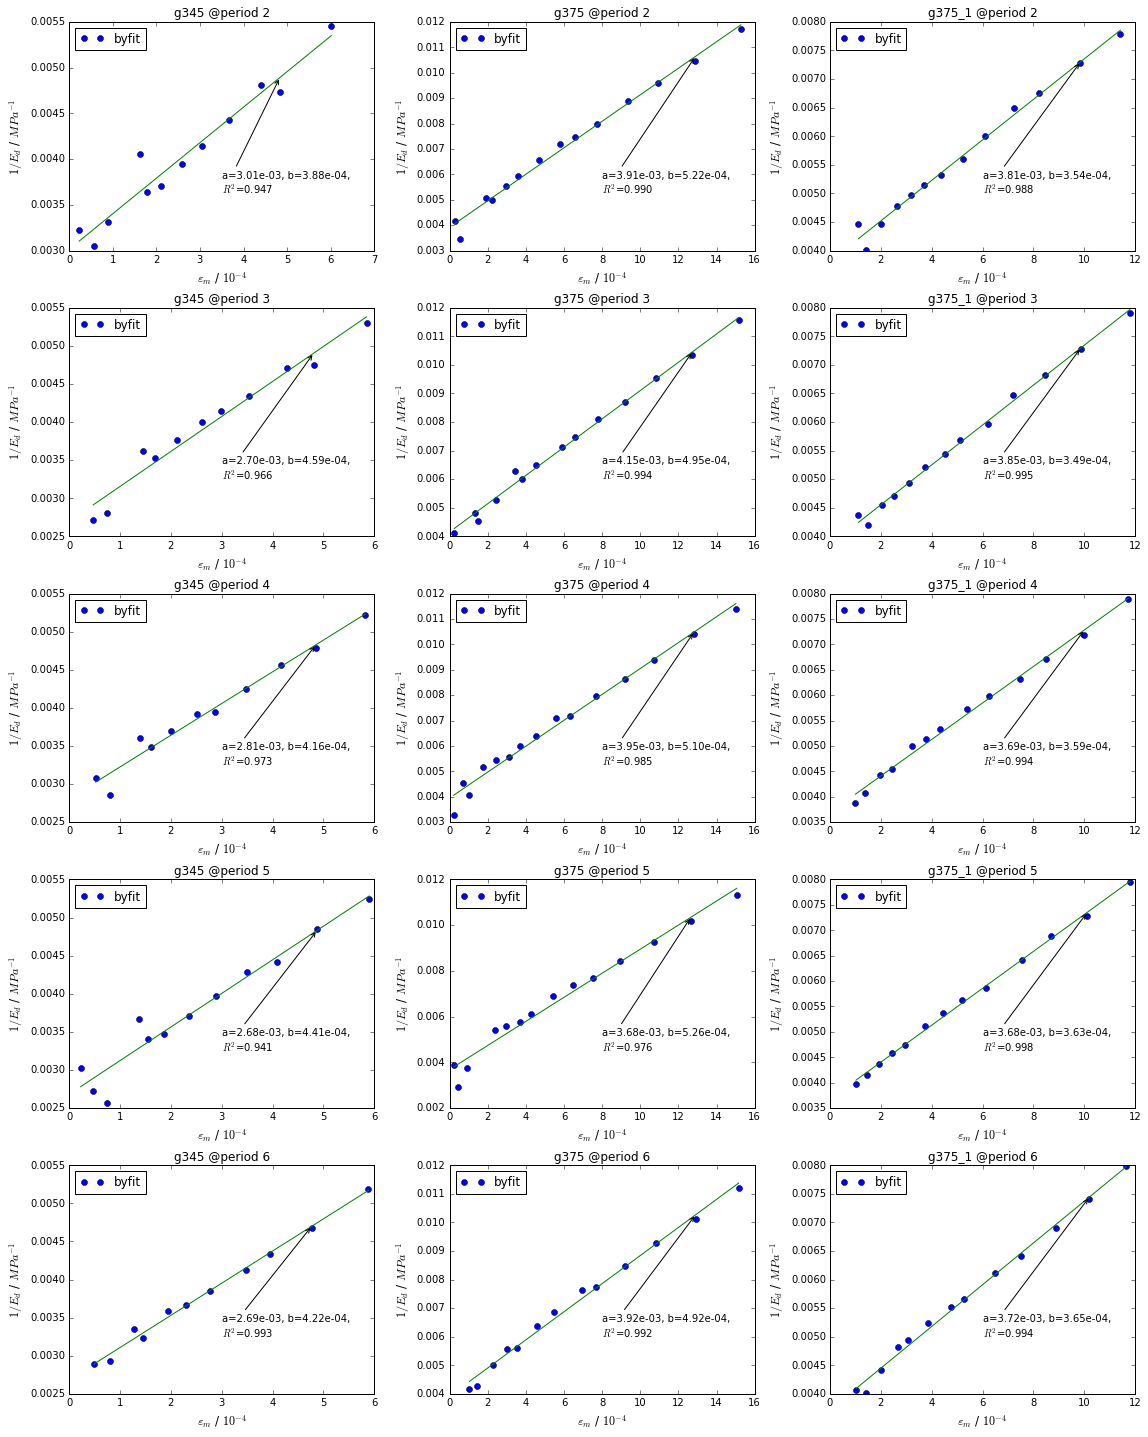

In [41]:
plt.figure(figsize=(16,20),dpi=300)
linetext = 'a={0:.2e}, b={1:.2e},\n$R^2$={2:.3f}'
style = dict(arrowstyle='->', connectionstyle='arc3', relpos=(0., 0.))
for i, k in enumerate(filedict):
    df = pd.read_csv(filedict[k], encoding='gb2312', header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    for p, col in enumerate('23456'):
        data = df[col]
        
        plt.subplot(5,3,3*p+i+1)
        x = data['epsilon_m_byfit'][1:].values*1e4
        y = 1e3/data['modulus_byfit'][1:].values
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]
        b, a, r, p, std_err = stats.linregress(x, y)
        y_lr = b*x+a
        plt.plot(x, y,'o',label='byfit')
        plt.plot(x, y_lr)
        plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.25), textcoords='axes fraction', arrowprops=style)
        
#         x = data['epsilon_m'][1:].values*1e4
#         y = 1000/data['modulus'][1:].values
#         b, a, r, p, std_err = stats.linregress(x, y)
#         y_lr = b*x+a
#         plt.plot(x, y,'s',label='nofit')
#         plt.plot(x, y_lr)
#         plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.1), textcoords='axes fraction', arrowprops=style)
        
        plt.legend(loc=0)
        plt.ylabel(r'$1/E_d$ / $MPa^{-1}$', fontsize=12)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=12)
        plt.title('{0} @period {1}'.format(k, col))
plt.tight_layout()
plt.savefig('figs/linearregressEd_byfit.svg')

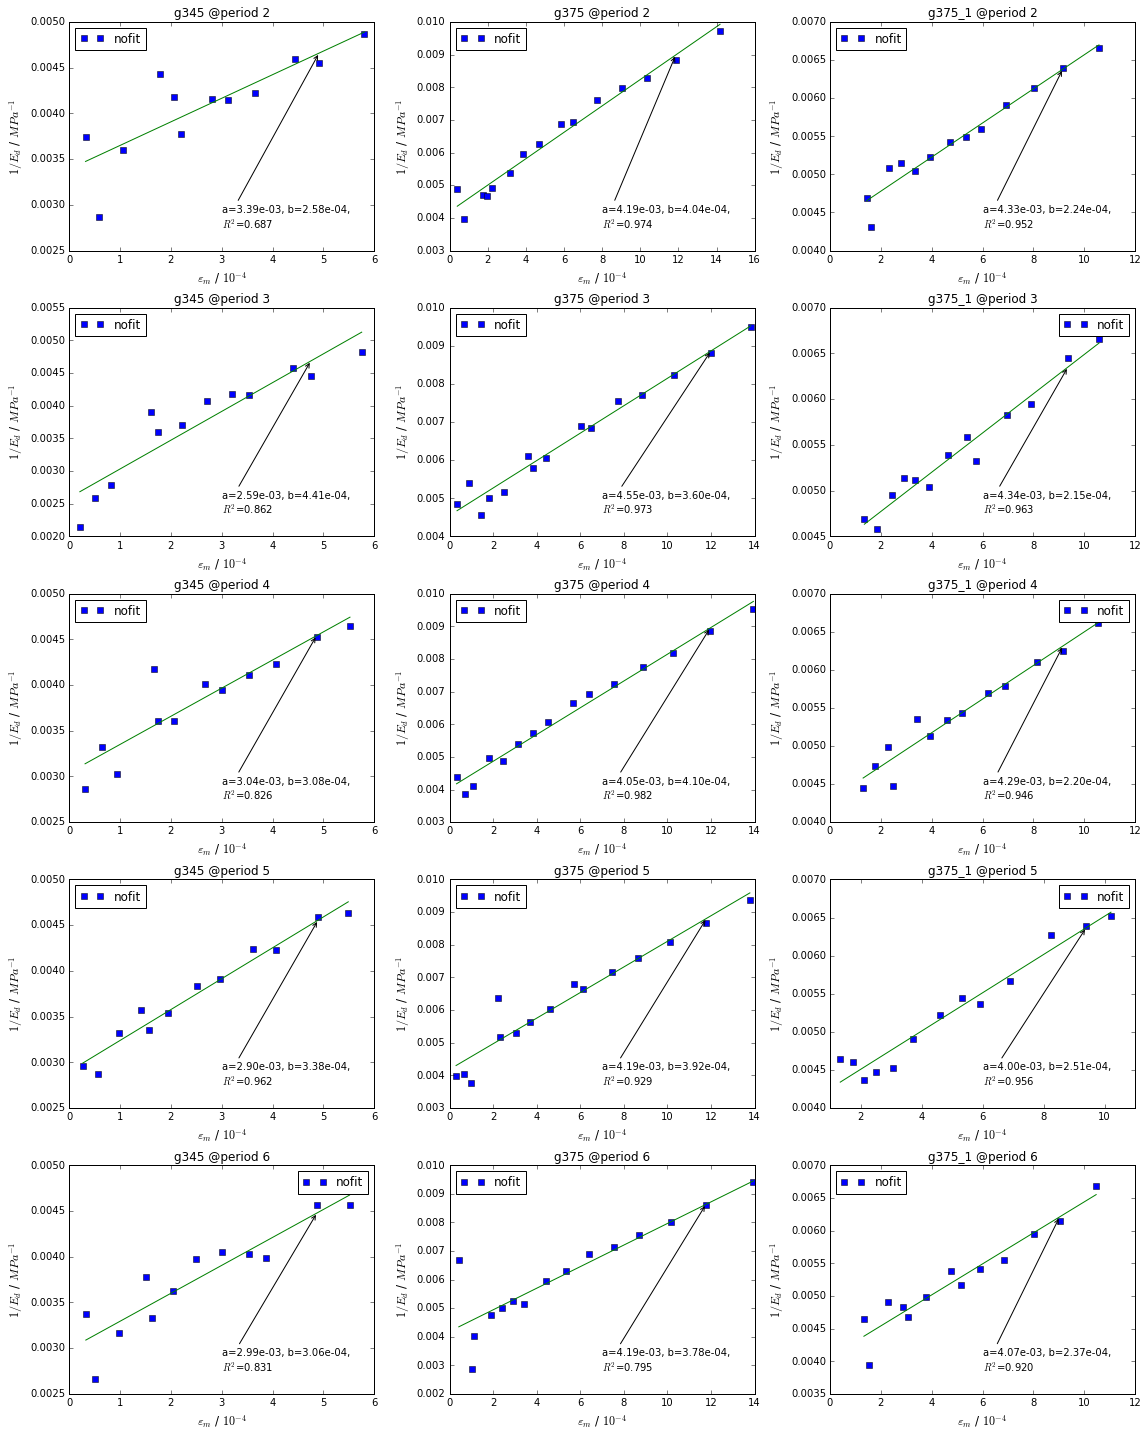

In [40]:
plt.figure(figsize=(16,20),dpi=300)
linetext = 'a={0:.2e}, b={1:.2e},\n$R^2$={2:.3f}'
style = dict(arrowstyle='->', connectionstyle='arc3', relpos=(0., 0.))
for i, k in enumerate(filedict):
    df = pd.read_csv(filedict[k], encoding='gb2312', header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    for p, col in enumerate('23456'):
        data = df[col]
        
        plt.subplot(5,3,3*p+i+1)
#         x = data['epsilon_m_byfit'][1:].values*1e4
#         y = 1e6/data['modulus_byfit'][1:].values
#         x = x[~np.isnan(x)]
#         y = y[~np.isnan(y)]
#         b, a, r, p, std_err = stats.linregress(x, y)
#         y_lr = b*x+a
#         plt.plot(x, y,'o',label='byfit')
#         plt.plot(x, y_lr)
#         plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.25), textcoords='axes fraction', arrowprops=style)
        
        x = data['epsilon_m'][1:].values*1e4
        y = 1000/data['modulus'][1:].values
        b, a, r, p, std_err = stats.linregress(x, y)
        y_lr = b*x+a
        plt.plot(x, y,'s',label='nofit')
        plt.plot(x, y_lr)
        plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.1), textcoords='axes fraction', arrowprops=style)
        
        plt.legend(loc=0)
        plt.ylabel(r'$1/E_d$ / $MPa^{-1}$', fontsize=12)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=12)
        plt.title('{0} @period {1}'.format(k, col))
plt.tight_layout()
plt.savefig('figs/linearregressEd_nofit.svg')

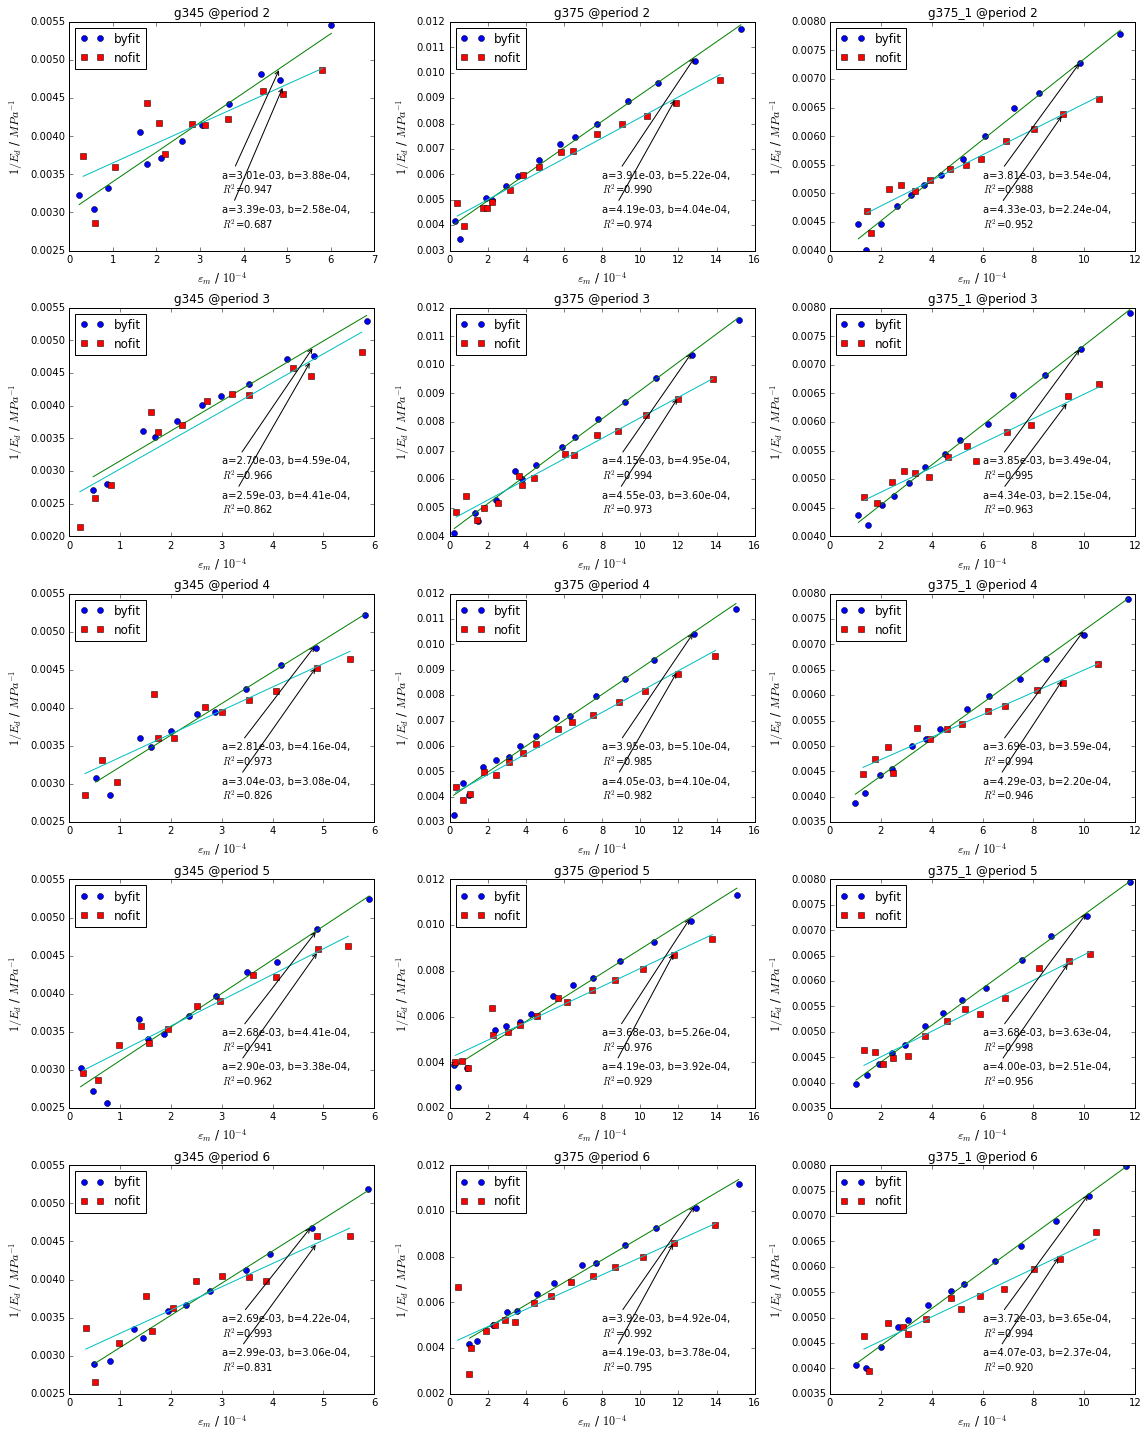

In [42]:
plt.figure(figsize=(16,20),dpi=300)
linetext = 'a={0:.2e}, b={1:.2e},\n$R^2$={2:.3f}'
style = dict(arrowstyle='->', connectionstyle='arc3', relpos=(0., 0.))
for i, k in enumerate(filedict):
    df = pd.read_csv(filedict[k], encoding='gb2312', header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    for p, col in enumerate('23456'):
        data = df[col]
        
        plt.subplot(5,3,3*p+i+1)
        x = data['epsilon_m_byfit'][1:].values*1e4
        y = 1e3/data['modulus_byfit'][1:].values
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]
        b, a, r, p, std_err = stats.linregress(x, y)
        y_lr = b*x+a
        plt.plot(x, y,'o',label='byfit')
        plt.plot(x, y_lr)
        plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.25), textcoords='axes fraction', arrowprops=style)
        
        x = data['epsilon_m'][1:].values*1e4
        y = 1000/data['modulus'][1:].values
        b, a, r, p, std_err = stats.linregress(x, y)
        y_lr = b*x+a
        plt.plot(x, y,'s',label='nofit')
        plt.plot(x, y_lr)
        plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.1), textcoords='axes fraction', arrowprops=style)
        
        plt.legend(loc=0)
        plt.ylabel(r'$1/E_d$ / $MPa^{-1}$', fontsize=12)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=12)
        plt.title('{0} @period {1}'.format(k, col))
plt.tight_layout()
plt.savefig('figs/linearregressEd.svg')